In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
database1=pd.read_excel('Data_Base_I.xlsx')
database1.head()

,Gender,Age,Сredit_sum,Currency,Term_of_crediting_in day,Interest rate_%,Duration_of_stay_in_a_sity,Maritial_status,Children,Job_position,Tenure_with_current_employer,Term_of_existence_of_enterprise,Company_type,Number_of_employees_in_kompany,Income_customer,Costs_customer,goal_credit,Result
0,Female,27,850.0,UAH,360,18.0,24_60,SINGLE,c0,PE,24_60,24_60,FS,100_9999,674,362,consumer_credit,good
1,Male,35,400.0,USD,240,12.0,24_60,SINGLE,c0,AS,24_60,24_60,FMG,51_100,690,342,consumer_credit,bad
2,Male,43,2750.0,UAH,240,14.0,24_60,MARRIED,c1,AS,12_18,12_24,OT,31_50,1588,767,consumer_credit,good
3,Male,43,15000.0,USD,1800,14.5,60_120,MARRIED,c1,TM,24_60,24_60,OT,0_5,4869,800,consumer_credit,bad
4,Male,28,2500.0,UAH,1080,18.0,60_120,SINGLE,c0,PE,0_3,0_12,FS,100_9999,637,382,consumer_credit,good


In [3]:
for col in database1.columns:
    print(f'{col}: n_unique:{len(database1[col].unique())}')

Gender: n_unique:2
Age: n_unique:42
Сredit_sum: n_unique:2281
Currency: n_unique:4
Term_of_crediting_in day: n_unique:141
Interest rate_%: n_unique:119
Duration_of_stay_in_a_sity : n_unique:7
Maritial_status: n_unique:4
Children: n_unique:4
Job_position: n_unique:5
Tenure_with_current_employer: n_unique:8
Term_of_existence_of_enterprise: n_unique:5
Company_type: n_unique:23
Number_of_employees_in_kompany : n_unique:5
Income_customer: n_unique:6722
Costs_customer: n_unique:1698
goal_credit: n_unique:6
Result: n_unique:2


In [4]:
discrete_cols=['Gender','Currency','Duration_of_stay_in_a_sity ','Maritial_status','Children','Job_position',\
              'Tenure_with_current_employer','Term_of_existence_of_enterprise','Company_type',\
              'Number_of_employees_in_kompany ','goal_credit','Result']
continious_cols=['Age','Сredit_sum','Term_of_crediting_in day','Interest rate_%','Income_customer',\
                'Costs_customer']

In [5]:
#Скорее всего, выбросы. Их нужно исправлять.
temp=database1['Term_of_crediting_in day'].quantile(0.998)
database1[database1['Term_of_crediting_in day']>temp]

,Gender,Age,Сredit_sum,Currency,Term_of_crediting_in day,Interest rate_%,Duration_of_stay_in_a_sity,Maritial_status,Children,Job_position,Tenure_with_current_employer,Term_of_existence_of_enterprise,Company_type,Number_of_employees_in_kompany,Income_customer,Costs_customer,goal_credit,Result
27,Female,25,2500.0,UAH,10800,18.0,120_9999,SINGLE,c0,PE,24_60,24_60,FS,51_100,246,0,consumer_credit,good
1033,Male,56,10300.0,USD,30660,11.6,120_9999,MARRIED,c0,MM,24_60,24_60,AG,100_9999,2433,964,flat,bad
1241,Female,54,2000.0,UAH,62235055,23.0,120_9999,MARRIED,c0,SP,120_9999,120_9999,FMG,31_50,645,444,overhaul,good
1242,Female,55,15000.0,UAH,58585420,22.0,120_9999,DIVORCED,c0,TM,24_60,24_60,OT,0_5,6345,2044,overhaul,good
1243,Male,49,29700.0,USD,62236880,12.5,24_60,MARRIED,c1,TM,60_120,60_120,WB,0_5,12218,3564,consumer_credit,good
1244,Female,52,5000.0,UAH,62235055,23.0,120_9999,DIVORCED,c0,TM,12_18,120_9999,FMG,6_15,1230,726,overhaul,bad
1245,Female,52,5000.0,UAH,69535055,22.0,120_9999,MARRIED,c1,MM,120_9999,120_9999,MFC,31_50,936,681,overhaul,good
2824,Female,56,7000.0,UAH,109685055,22.0,120_9999,MARRIED,c0,MM,60_120,120_9999,OT,51_100,1079,767,overhaul,good
2825,Male,54,8000.0,UAH,3871920,22.0,120_9999,MARRIED,c2,AS,120_9999,120_9999,MFC,31_50,975,699,consumer_credit,good
5289,Male,55,3700.0,USD,13140,12.0,120_9999,MARRIED,c2,MM,0_3,120_9999,FS,31_50,2383,180,consumer_credit,good


In [6]:
#установим 20 лет - как максимальный срок выдачи кредита
max_term=database1['Term_of_crediting_in day'].quantile(0.998)
median_term=database1['Term_of_crediting_in day'].quantile(0.5)
database1['Term_of_crediting_in day'].apply(lambda x: median_term if x>max_term else x).describe()

count    15000.000000
mean      2014.997333
std       1625.735545
min         30.000000
25%        720.000000
50%       1800.000000
75%       2520.000000
max       7300.000000
Name: Term_of_crediting_in day, dtype: float64

In [7]:
#Выглядит уже лучше. Медиана и мат. ожидание примерно совпадают. Применим к датасету
database1['Term_of_crediting_in day']=database1['Term_of_crediting_in day'].apply(lambda x: median_term if x>max_term else x)
#database1.describe()

# Надо дискретизировать непрерывные переменные

In [8]:
X_discrete=database1[discrete_cols]
X_continious=database1[continious_cols]
target='Result'

In [9]:
#'uniform', 'quantile', 'kmeans' - стратегии для дискретизации
from sklearn.preprocessing import KBinsDiscretizer
enc = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='quantile')
X_cont=enc.fit_transform(X_continious).astype('str')
data_discretized=pd.DataFrame(data=np.hstack([X_discrete.astype('str'),X_cont]), columns=discrete_cols+continious_cols)
data_discretized.head()

,Gender,Currency,Duration_of_stay_in_a_sity,Maritial_status,Children,Job_position,Tenure_with_current_employer,Term_of_existence_of_enterprise,Company_type,Number_of_employees_in_kompany,goal_credit,Result,Age,Сredit_sum,Term_of_crediting_in day,Interest rate_%,Income_customer,Costs_customer
0,Female,UAH,24_60,SINGLE,c0,PE,24_60,24_60,FS,100_9999,consumer_credit,good,0.0,0.0,0.0,3.0,0.0,0.0
1,Male,USD,24_60,SINGLE,c0,AS,24_60,24_60,FMG,51_100,consumer_credit,bad,1.0,0.0,0.0,0.0,0.0,0.0
2,Male,UAH,24_60,MARRIED,c1,AS,12_18,12_24,OT,31_50,consumer_credit,good,2.0,0.0,0.0,1.0,1.0,2.0
3,Male,USD,60_120,MARRIED,c1,TM,24_60,24_60,OT,0_5,consumer_credit,bad,2.0,2.0,2.0,1.0,2.0,2.0
4,Male,UAH,60_120,SINGLE,c0,PE,0_3,0_12,FS,100_9999,consumer_credit,good,0.0,0.0,1.0,3.0,0.0,0.0


# Разделяем выборку на train, test(Таргет не выбрасываем, он нужен для построения сети)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, _, y_test=train_test_split(data_discretized, data_discretized[target],test_size=0.1,\
                                            random_state=42)

# Теперь строим саму сеть Байеса

In [11]:
#Вводим список обязательных и запрещенных ребер.
black_list_edges=[(i,'Gender')for i in database1.columns]\
                        +[(i,'Age') for i in database1.columns]
black_list_edges.remove(('Gender','Gender'))
black_list_edges.remove(('Age','Age'))
fixed_edges_list=[('Age','Maritial_status'), ('Maritial_status','Children')]

In [12]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, MaximumLikelihoodEstimator,BayesianEstimator, PC
from pgmpy.estimators import BicScore, BDeuScore, K2Score

#построение структуры(направленный ациклический граф)
es=HillClimbSearch(X_train, scoring_method=BicScore(X_train))
best_model=es.estimate(black_list=black_list_edges,fixed_edges=fixed_edges_list,epsilon=1e-6)

#es=PC(X_train)
#best_model=es.estimate(variant='parallel')

  0%|          | 34/1000000 [00:25<207:40:29,  1.34it/s]


In [13]:
best_model.get_parents('Result')

['Income_customer', 'Costs_customer']

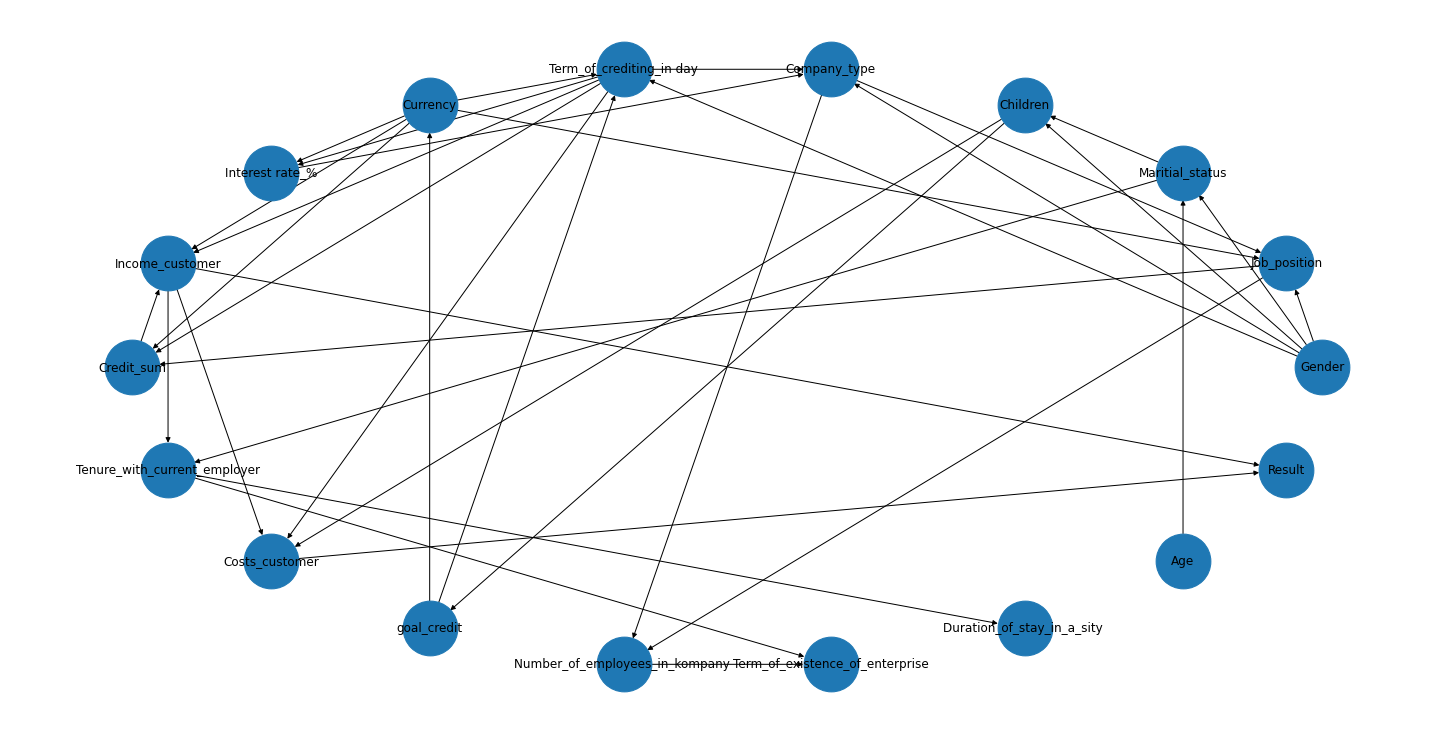

In [14]:
import networkx as nx
import matplotlib.pyplot as plt 

G = nx.MultiDiGraph()
G.add_edges_from(best_model.edges())

plt.figure(figsize=(20,10))
#nx.draw_networkx(G,node_size=3000)
nx.draw_circular(G,node_size=3000, with_labels=True)

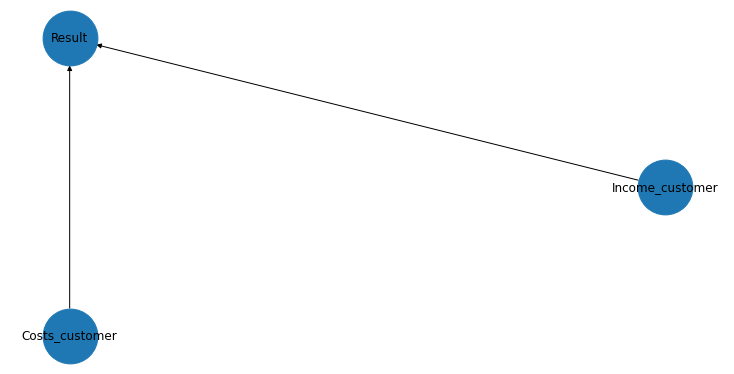

In [15]:
#Чтобы быстрее обучаться, оставим только ребра связанные с Result
#edges=[('Income_customer','Result'),('Costs_customer','Result')]
edges=[i for i in best_model.edges() if (i[1]=='Result')]
G = nx.MultiDiGraph()
G.add_edges_from(edges)
plt.figure(figsize=(10,5))
#nx.draw_networkx(G,node_size=3000)
nx.draw_circular(G,node_size=3000, with_labels=True)

In [16]:
#edges=[('Income_customer','Result'),('Costs_customer','Result')]
edges=[i for i in best_model.edges() if (i[1]=='Result')]
model_mle=BayesianModel(edges)
model_mle.fit(data=X_train,estimator=MaximumLikelihoodEstimator)
res_mle=pd.DataFrame(columns=['Result_bad','Result_good','true value'])
step=30 #делаю выводы кусками по 30 шт, чтобы отслеживать прогресс
for i in np.arange(0,len(X_test),step):
    y_predicted1=model_mle.predict_probability(X_test[['Income_customer','Costs_customer']][i:i+step])
    y_predicted1['true value']=y_test[i:i+step]
    res_mle=res_mle.append(y_predicted1)
    print(i/step)
print(res_mle)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
       Result_bad  Result_good true value
11499    0.150587     0.849413       good
6475     0.026408     0.973592       good
13167    0.026365     0.973635       good
862      0.032468     0.967532       good
5970     0.026365     0.973635       good
...           ...          ...        ...
2655     0.027142     0.972858       good
11672    0.150587     0.849413        bad
8990     0.027142     0.972858       good
8517     0.027138     0.972862       good
13492    0.052212     0.947788       good

[1500 rows x 3 columns]


In [17]:
#настройка параметров(условных распределений)
model=BayesianModel(edges)
model.fit(data=X_train, estimator=BayesianEstimator,equivalent_sample_size=20)
res=pd.DataFrame(columns=['Result_bad','Result_good','true value'])
step=30 #делаю выводы кусками по 30 шт, чтобы отслеживать прогресс
for i in np.arange(0,len(X_test),step):
    y_predicted1=model.predict_probability(X_test[['Income_customer','Costs_customer']][i:i+step])
    y_predicted1['true value']=y_test[i:i+step]
    res=res.append(y_predicted1)
    print(i/step)
print(res)

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.0
8.0
9.0
10.0
11.0
12.0
13.0
14.0
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.0
29.0
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
       Result_bad  Result_good true value
11499    0.150810     0.849190       good
6475     0.026929     0.973071       good
13167    0.026644     0.973356       good
862      0.036232     0.963768       good
5970     0.026644     0.973356       good
...           ...          ...        ...
2655     0.027642     0.972358       good
11672    0.150810     0.849190        bad
8990     0.027642     0.972358       good
8517     0.027624     0.972376       good
13492    0.052707     0.947293       good

[1500 rows x 3 columns]


# Экспериментируем с порогом классификации. Больше порога - good, меньше порога bad
# negative - bad, positive good

In [18]:
#MaximumLikelihoodEstimator
print("MaximumLikelihoodEstimator")
from sklearn.metrics import *
for i in [0.8,0.85,0.9,0.95]:
    res_mle[f'threshold{i}']=res_mle['Result_good'].apply(lambda x:'good'if(x>=i) else 'bad')
    temp=res_mle[f'threshold{i}']
    print('//////////////////////////////////////////////////')
    print(f'threshold={i}')
    print(confusion_matrix(y_test,temp))
    print(f"accuracy=(tp+tn)/(tp+fp+tn+fn)={accuracy_score(y_test,temp)}")
    print(f"precision(for bad)=tn/(tn+fn)={precision_score(y_test,temp,pos_label='bad')}, recall(for bad)=tn/(tn+fp)={recall_score(y_test,temp,pos_label='bad')}")

MaximumLikelihoodEstimator
//////////////////////////////////////////////////
threshold=0.8
[[   0   94]
 [   0 1406]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.9373333333333334
precision(for bad)=tn/(tn+fn)=0.0, recall(for bad)=tn/(tn+fp)=0.0
//////////////////////////////////////////////////
threshold=0.85
[[  38   56]
 [ 178 1228]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.844
precision(for bad)=tn/(tn+fn)=0.17592592592592593, recall(for bad)=tn/(tn+fp)=0.40425531914893614
//////////////////////////////////////////////////
threshold=0.9
[[  38   56]
 [ 178 1228]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.844
precision(for bad)=tn/(tn+fn)=0.17592592592592593, recall(for bad)=tn/(tn+fp)=0.40425531914893614
//////////////////////////////////////////////////
threshold=0.95
[[  56   38]
 [ 349 1057]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.742
precision(for bad)=tn/(tn+fn)=0.1382716049382716, recall(for bad)=tn/(tn+fp)=0.5957446808510638


/home/ivan/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
print("BayesianSearch")
from sklearn.metrics import *
for i in [0.8,0.85,0.9,0.95]:
    res[f'threshold{i}']=res['Result_good'].apply(lambda x:'good'if(x>=i) else 'bad')
    temp=res[f'threshold{i}']
    print('//////////////////////////////////////////////////')
    print(f'threshold={i}')
    print(confusion_matrix(y_test,temp))
    print(f"accuracy=(tp+tn)/(tp+fp+tn+fn)={accuracy_score(y_test,temp)}")
    print(f"precision(for bad)=tn/(tn+fn)={precision_score(y_test,temp,pos_label='bad')}, recall(for bad)=tn/(tn+fp)={recall_score(y_test,temp,pos_label='bad')}")

BayesianSearch
//////////////////////////////////////////////////
threshold=0.8
[[   0   94]
 [   0 1406]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.9373333333333334
precision(for bad)=tn/(tn+fn)=0.0, recall(for bad)=tn/(tn+fp)=0.0
//////////////////////////////////////////////////
threshold=0.85
[[  38   56]
 [ 178 1228]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.844
precision(for bad)=tn/(tn+fn)=0.17592592592592593, recall(for bad)=tn/(tn+fp)=0.40425531914893614
//////////////////////////////////////////////////
threshold=0.9
[[  38   56]
 [ 178 1228]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.844
precision(for bad)=tn/(tn+fn)=0.17592592592592593, recall(for bad)=tn/(tn+fp)=0.40425531914893614
//////////////////////////////////////////////////
threshold=0.95
[[  56   38]
 [ 349 1057]]
accuracy=(tp+tn)/(tp+fp+tn+fn)=0.742
precision(for bad)=tn/(tn+fn)=0.1382716049382716, recall(for bad)=tn/(tn+fp)=0.5957446808510638


In [20]:
# Итого порог 0.8 совсем не угадывает плохие кредиты. C[0,0]=0(True Negative)
# Порог 0.85 уже лучше, 38 верно угаданных плохих кредитов.
# Порог 0.9 тоже самое что 0.85
# Порог 0.95 угадывает больше плохих кредитов(уже 56). 
# Нам это главное, поскольку, ошибки False Positive опаснее(выданный кредит не вернули), 
                                            # чем ошибки False Negative(не выдали кредит, который бы вернули)
# мы угадываем 60% плохих кредитов при пороге 0.95. 0.13 из предсказанных bad являются bad на самом деле
# (обьяснение precision-recall)
# Выбор порога очевиден - в пользу 0.95 поскольку нам важен recall относительно плохих кредитов.
# Методы максимального правдоподобия и байесовский поиск дали примерно одинаковые результаты(при одной и той же структуре сети)